In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:

# Load data
df = pd.read_csv('t:/ML_Prj/final_cleaned_traffic_data.csv')
df.head()

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.000000,100.0,5.0,0.0,Low,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,1.001253,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.000000,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.000000,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.000000,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0


In [ ]:
# Select Driver_Age as X (independent) and Speed_Limit as y (dependent)
X = df['Driver_Age'].values.reshape(-1, 1)  # Independent variable
y = df['Speed_Limit'].values  # Dependent variable


In [5]:
X

array([[51.       ],
       [49.       ],
       [54.       ],
       [34.       ],
       [62.       ],
       [49.       ],
       [27.       ],
       [29.       ],
       [38.       ],
       [50.       ],
       [47.       ],
       [25.       ],
       [67.       ],
       [61.       ],
       [46.       ],
       [48.       ],
       [53.       ],
       [35.       ],
       [59.       ],
       [27.       ],
       [32.       ],
       [53.       ],
       [69.       ],
       [68.       ],
       [28.       ],
       [40.       ],
       [30.       ],
       [60.       ],
       [66.       ],
       [43.2593985],
       [63.       ],
       [59.       ],
       [65.       ],
       [18.       ],
       [33.       ],
       [55.       ],
       [38.       ],
       [46.       ],
       [33.       ],
       [45.       ],
       [40.       ],
       [69.       ],
       [33.       ],
       [22.       ],
       [26.       ],
       [59.       ],
       [58.       ],
       [23.  

In [6]:
y

array([100., 120.,  60.,  60., 195., 120.,  60.,  60.,  60.,  30., 100.,
        60.,  30.,  60.,  60.,  60., 100.,  60.,  50.,  60., 100.,  30.,
        30.,  50., 100.,  60., 100.,  80.,  80.,  80.,  30., 100.,  60.,
        60.,  60.,  50., 120., 100.,  60.,  50.,  60.,  60.,  50.,  60.,
        60.,  30.,  30.,  60.,  50.,  60.,  80.,  60.,  60.,  80., 100.,
        50., 100., 100.,  60.,  50., 200., 120.,  50.,  80.,  80.,  30.,
        80.,  60., 206.,  30., 120.,  80.,  60.,  60.,  50.,  60.,  50.,
        30.,  30.,  80., 100.,  60.,  80.,  30.,  80.,  50.,  60.,  80.,
        60.,  60.,  50.,  60.,  50., 100.,  50.,  60.,  80.,  50.,  30.,
        80.,  30., 178.,  60., 100.,  60.,  60.,  60.,  60.,  30.,  50.,
        60.,  80.,  60.,  60.,  60.,  80.,  60.,  60., 208.,  50.,  80.,
        50.,  60.,  80.,  60.,  50., 100., 120.,  50.,  50., 100.,  60.,
       100.,  50.,  60.,  50.,  60.,  80.,  80.,  50.,  60.,  30.,  60.,
        60.,  80.,  80.,  80.,  30.,  80.,  60., 10

In [7]:

# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:

# 3. Create and train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
## Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

## Calculate MSE
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, model.predict(X_test))
    


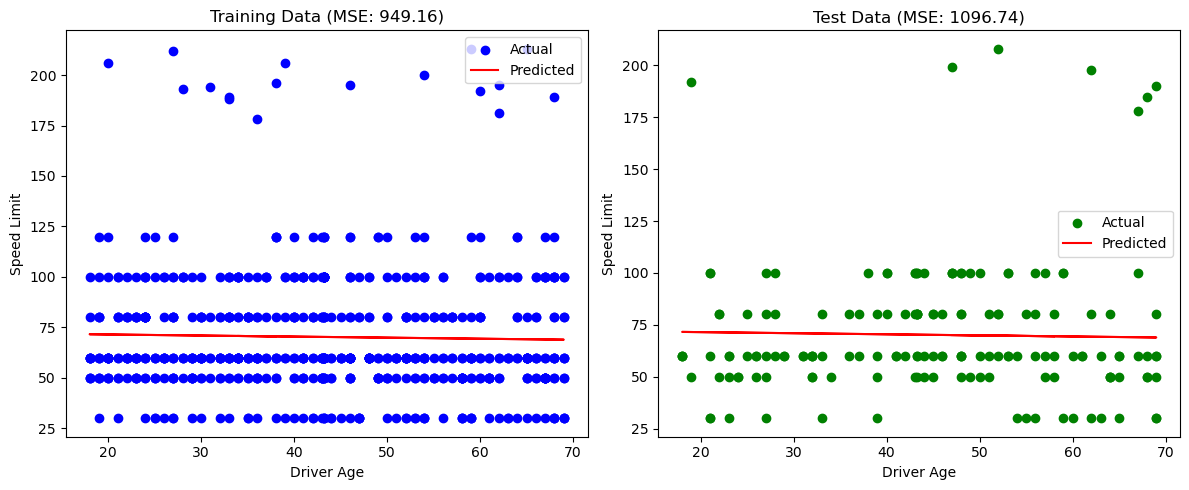


Regression Line: y = -0.05x + 72.54
Training MSE: 949.16
Test MSE: 1096.74
R² Score: -0.0058


In [ ]:
## Plotting
plt.figure(figsize=(12, 5))

# Training data plot
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', label='Actual')
plt.plot(X_train, y_train_pred, color='red', label='Predicted')
plt.title(f'Training Data (MSE: {train_mse:.2f})')
plt.xlabel('Driver Age')
plt.ylabel('Speed Limit')
plt.legend()

# Test data plot
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='green', label='Actual')
plt.plot(X_test, y_test_pred, color='red', label='Predicted')
plt.title(f'Test Data (MSE: {test_mse:.2f})')
plt.xlabel('Driver Age')
plt.ylabel('Speed Limit')
plt.legend()

plt.tight_layout()
plt.show()

# Print model details
print(f"\nRegression Line: y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}")
print(f"Training MSE: {train_mse:.2f}")
print(f"Test MSE: {test_mse:.2f}")
print(f"R² Score: {r2:.4f}")

lets check with other attributes

Text(0, 0.5, 'Speed Limit (km/h)')

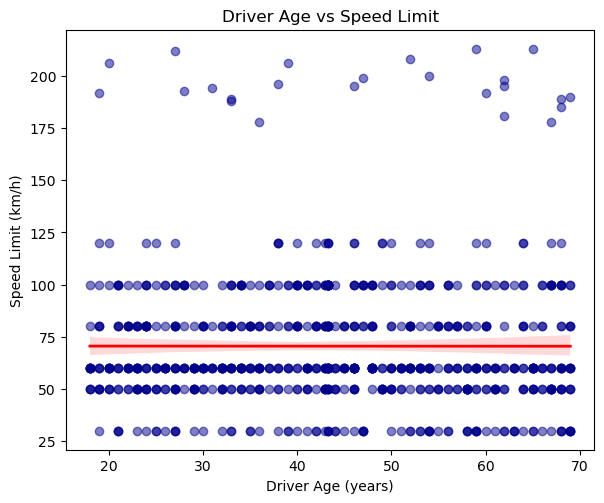

In [20]:
# Create figure for multiple plots
fig = plt.figure(figsize=(15, 12))

# 1. Driver Age vs Speed Limit with regression line
plt.subplot(2, 2, 1)
sns.regplot(data=df, x='Driver_Age', y='Speed_Limit', 
            scatter_kws={'alpha':0.5, 'color':'darkblue'},
            line_kws={'color': 'red', 'linewidth': 2})
plt.title('Driver Age vs Speed Limit', fontsize=12)
plt.xlabel('Driver Age (years)')
plt.ylabel('Speed Limit (km/h)')


Text(0, 0.5, 'Speed Limit (km/h)')

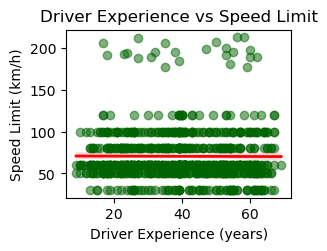

In [21]:

# 2. Driver Experience vs Speed Limit
plt.subplot(2, 2, 2)
sns.regplot(data=df, x='Driver_Experience', y='Speed_Limit',
            scatter_kws={'alpha':0.5, 'color':'darkgreen'},
            line_kws={'color': 'red', 'linewidth': 2})
plt.title('Driver Experience vs Speed Limit', fontsize=12)
plt.xlabel('Driver Experience (years)')
plt.ylabel('Speed Limit (km/h)')


Text(0, 0.5, 'Number of Vehicles')

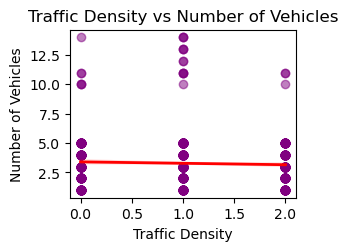

In [22]:
# 3. Traffic Density vs Number of Vehicles
plt.subplot(2, 2, 3)
sns.regplot(data=df, x='Traffic_Density', y='Number_of_Vehicles',
            scatter_kws={'alpha':0.5, 'color':'purple'},
            line_kws={'color': 'red', 'linewidth': 2})
plt.title('Traffic Density vs Number of Vehicles', fontsize=12)
plt.xlabel('Traffic Density')
plt.ylabel('Number of Vehicles')

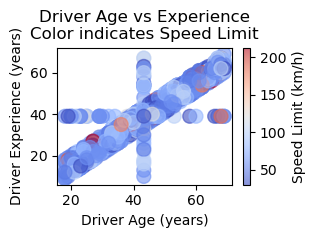

In [33]:
# Print regression metrics
print("\nRegression Analysis Results:")
print("-" * 80)

feature_pairs = [
    ('Driver_Age', 'Speed_Limit'),
    ('Driver_Experience', 'Speed_Limit'),
    ('Traffic_Density', 'Number_of_Vehicles')
]

for x_var, y_var in feature_pairs:
    # Prepare data
    X = df[x_var].values.reshape(-1, 1)
    y = df[y_var].values
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    # Fit model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Calculate metrics
    train_mse = mean_squared_error(y_train, model.predict(X_train))
    test_mse = mean_squared_error(y_test, model.predict(X_test))
    r2 = r2_score(y_test, model.predict(X_test))
    
    print(f"\n{x_var} vs {y_var}:")
    print(f"Training MSE: {train_mse:.2f}")
    print(f"Test MSE: {test_mse:.2f}")
    print(f"R² Score: {r2:.4f}")


Regression Analysis Results:
--------------------------------------------------------------------------------

Driver_Age vs Speed_Limit:
Training MSE: 949.16
Test MSE: 1096.74
R² Score: -0.0058

Driver_Experience vs Speed_Limit:
Training MSE: 949.03
Test MSE: 1096.77
R² Score: -0.0058

Traffic_Density vs Number_of_Vehicles:
Training MSE: 3.58
Test MSE: 4.97
R² Score: -0.0079


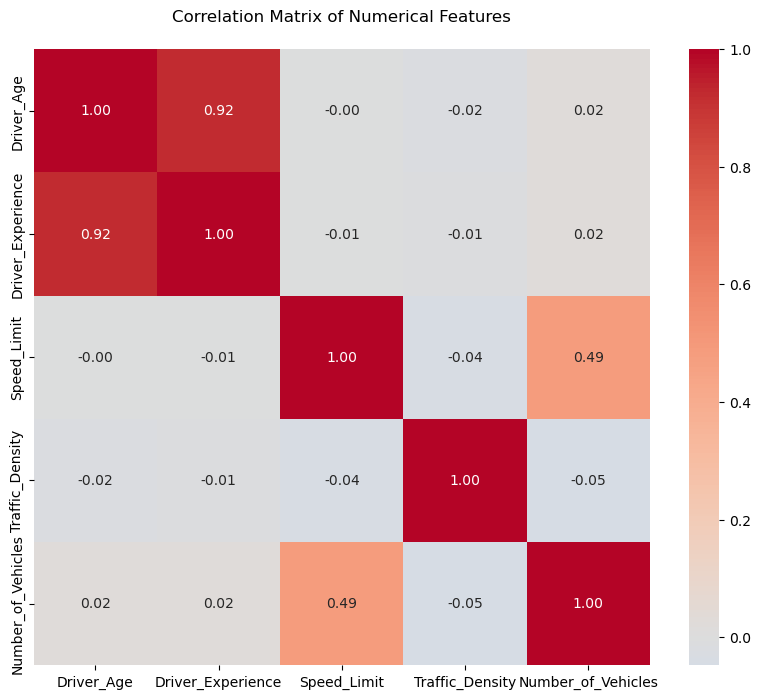

In [27]:
# Correlation Analysis
plt.figure(figsize=(10, 8))
correlation_vars = ['Driver_Age', 'Driver_Experience', 
                   'Speed_Limit', 'Traffic_Density', 
                   'Number_of_Vehicles']
correlation_matrix = df[correlation_vars].corr()

sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            fmt='.2f',
            square=True)
plt.title('Correlation Matrix of Numerical Features', pad=20)
plt.show()